# TP Stéréoscopie&Segmentation

## 1-Anaglyphe

In [2]:
from PIL import Image
import sys
import cv2
from matplotlib import pyplot as plt
import numpy as np



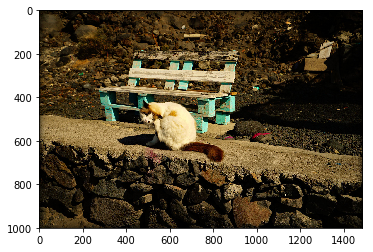

In [3]:
imLeft = Image.open("cat_l.jpg")
plt.imshow(imLeft,'gray')
plt.show()

In [4]:
imRight = Image.open("cat_r.jpg")
plt.imshow(imRight,'gray')
plt.show()

IOError: [Errno 2] No such file or directory: 'cat_r.jpg'

In [5]:
lRed, lGreen, lBlue = imLeft.split()
rRed, rGreen, rBlue = imRight.split()
im3D = Image.merge('RGB', [rRed, lGreen, lBlue])
plt.imshow(im3D,'gray')
plt.show()

NameError: name 'imRight' is not defined

## 2- Carte de disparité

In [6]:

imgL = cv2.imread('cat_l.jpg',0)
imgR = cv2.imread('cat_r.jpg',0)

stereo = cv2.StereoBM_create(numDisparities=128, blockSize=45)
#stereo.setPreFilterCap(20)

disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()

error: OpenCV(4.2.0) /io/opencv/modules/calib3d/src/stereobm.cpp:1102: error: (-209:Sizes of input arguments do not match) All the images must have the same size in function 'compute'


In [7]:
kernel = np.ones((8,8), np.uint8)
closing = cv2.morphologyEx(disparity, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,'gray') 
plt.show()


NameError: name 'disparity' is not defined

In [8]:
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)
plt.imshow(opening,'gray') 
plt.show()


NameError: name 'closing' is not defined

In [ ]:
gray = cv2.cvtColor(np.uint8(imLeft), cv2.COLOR_BGR2GRAY) 
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])

#Pixel value gets brighter as objects are closer to foreground
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0

#Reshaping Image back to 2 dimensions
gray = gray_r.reshape(gray.shape[0],gray.shape[1])

#Printing Image
plt.imshow(gray, cmap='gray')
plt.show()
